In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-03-18 13:18:44.703566


# Lukumäärä- ja prosenttiyhteenvedot

Tämä muistio sisältää likimain kaiken mitä sinun tarvitsee tietää lukumäärien ja prosenttien laskemisesta Pythonin pandas-kirjastoa käyttäen.

In [2]:
# Tuon tarvittavat kirjastot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Jos prosentit desimaalilukuina, niin käytän tätä akselin muotoiluun 
myFmt1 = PercentFormatter(xmax = 1, decimals = 0, symbol = ' %')

# Jos prosentit on jo valmiiksi kerrottu sadalla, niin käytän tätä akselin muotoiluun
myFmt100 = PercentFormatter(xmax = 100, decimals = 0, symbol = ' %')

# Grafiikan tyylimääritys
plt.style.use('seaborn-white')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


## Muuttujien tekstimuotoiset arvot

Muuttujien mahdolliset tektimuotoiset arvot kannattaa tallentaa lista-muuttujiin. Listoja on myöhemmin helppo lisätä tulostaulukoihin.

In [4]:
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
perhe = ['Perheetön', 'Perheellinen']
sukup = ['Mies', 'Nainen']
tyytyväisyys = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
                'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']

# Monivalintakysymyksen (mitä etuisuuksia olet käyttänyt?) vaihtoehtojen lista
monivalinnat = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

## crosstab-funktio laskee lukumäärät

**crosstab-funktio** palauttaa dataframen. Voin helposti luoda dataframeen uuden sarakkeen, johon lasken prosentit. 

In [5]:
df1 = pd.crosstab(df['koulutus'], 'f')

# Korvaan riviotsikot aiemmin määritellyllä koulutus-listalla
df1.index = koulutus

# Poistan vasemmasta yläkulmasta häiritsevän otsikon
df1.columns.name = ''

# Lisään prosentti-sarakkeen
n = df1['f'].sum()
df1['f (%)'] = df1 / n * 100

# Säädän desimaalien määrät ja korvaan desimaalipisteen pilkulla
# decimal-parametri toimii pandas-versiosta 1.3.0 lähtien
# Tämä ei vaikuta tietokehikon sisältöön, vaan ainoastaan tässä tulostetun taulukon ulkoasuun
df1.style.format({'f':'{:.0f}', 'f (%)':'{:.1f}'}, decimal=',')

,f,f (%)
Peruskoulu,27,"33,3"
2. aste,30,"37,0"
Korkeakoulu,22,"27,2"
Ylempi korkeakoulu,2,"2,5"


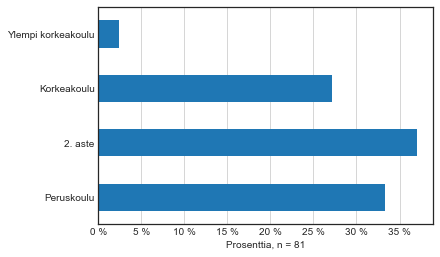

In [6]:
# Vaakapylväskaavio prosenteista
df1['f (%)'].plot.barh()

# x-akselin otsikointi; n-arvo mukaan
plt.xlabel(f'Prosenttia, n = {n}')

# x-akselin jakoviivojen otsikoiden muotoilu
plt.gca().xaxis.set_major_formatter(myFmt100)

# Pystysuuntainen taustaviivoitus
plt.grid(axis='x')

## crosstab-funktio laskee ristiintaulukoinnit

In [7]:
# Ristiintaulukointi
df2 = pd.crosstab(df['koulutus'], df['sukup'])

# Otsikot kuntoon:
df2.index = koulutus
df2.columns = sukup

df2

,Mies,Nainen
Peruskoulu,22,5
2. aste,23,7
Korkeakoulu,15,7
Ylempi korkeakoulu,2,0


In [8]:
# Ristiintaulukointi, prosentit (normalize) sarakkeiden mukaan
df3 = pd.crosstab(df['koulutus'], df['sukup'], normalize='columns')

# Otsikot kuntoon
df3.index = koulutus
df3.columns = sukup

# Kikkailen n-arvot mukaan
for muuttuja in df3.columns:
    df3 = df3.rename(columns={muuttuja:f'{muuttuja},  n = {df2[muuttuja].sum()}'})

# Loppusilaus
(df3 * 100).style.format('{:.1f} %', decimal=',')

,"Mies, n = 62","Nainen, n = 19"
Peruskoulu,"35,5 %","26,3 %"
2. aste,"37,1 %","36,8 %"
Korkeakoulu,"24,2 %","36,8 %"
Ylempi korkeakoulu,"3,2 %","0,0 %"


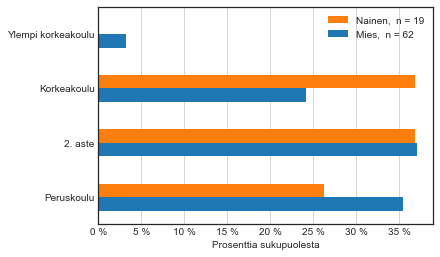

In [9]:
# Edellinen pylväinä; legend = 'reverse' kääntää selitteen järjestyksen
df3.plot.barh(legend='reverse')

plt.xlabel('Prosenttia sukupuolesta')

# x-akselin jakoviivojen otsikoiden muotoilu
plt.gca().xaxis.set_major_formatter(myFmt1)

# Pystysuuntainen taustaviivoitus
plt.grid(axis='x')

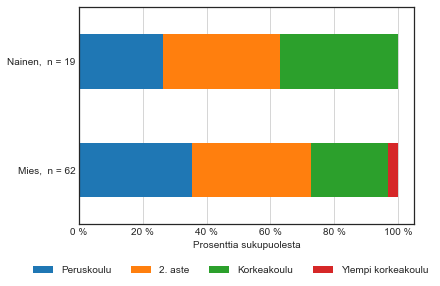

In [10]:
# Edellinen 100 % pinottuina vaakapylväinä, T vaihtaa arvosarjat ja kategoriat päittäin
df3.T.plot.barh(stacked=True)

plt.xlabel('Prosenttia sukupuolesta')

# Selitteen sijoittelu suhteessa origoon, selitteitä 4 vierekkäin
plt.legend(loc = (-0.15, -0.25), ncol=4)
 
# x-akselin jakoviivojen otsikoiden muotoilu
plt.gca().xaxis.set_major_formatter(myFmt1)

# Pystysuuntainen taustaviivoitus
plt.grid(axis='x')

## Useiden muuttujien frekvenssit yhteen taulukkoon

Tässä kannattaa käyttää **value_counts**-funktiota.

In [11]:
# Lasken prosentit value_counts()-toiminnolla ja muutan tuloksen dataframeksi
df4 = df['johto'].value_counts(sort=False, normalize=True).to_frame()

# Lisään tietokehikkoon uusia sarakkeita
df4['työtov'] = df['työtov'].value_counts(sort=False, normalize=True)
df4['työymp'] = df['työymp'].value_counts(sort=False, normalize=True)
df4['palkkat'] = df['palkkat'].value_counts(sort=False, normalize=True)
df4['työteht'] = df['työteht'].value_counts(sort=False, normalize=True)

# Riviotsikot aiemmin määritellystä tyytyväisyys-listasta
df4.index = tyytyväisyys

# Yhteensä-rivi
df4.loc['Yhteensä'] = df4.sum()

# Loppusilaus
# na_rep-parametrin ansiosta puuttuva arvo näytetään viivana
(df4 * 100).style.format('{:.1f} %', na_rep='-', decimal=',')

,johto,työtov,työymp,palkkat,työteht
Erittäin tyytymätön,"36,6 %","19,8 %","36,6 %","23,2 %","35,4 %"
Jokseenkin tyytymätön,"8,5 %",-,"11,0 %","40,2 %","6,1 %"
Ei tyytymätön eikä tyytyväinen,"19,5 %","3,7 %","11,0 %","23,2 %","18,3 %"
Jokseenkin tyytyväinen,"28,0 %","43,2 %","28,0 %","12,2 %","30,5 %"
Erittäin tyytyväinen,"7,3 %","33,3 %","13,4 %","1,2 %","9,8 %"
Yhteensä,"100,0 %","100,0 %","100,0 %","100,0 %","100,0 %"


Seuraavassa lisätietoa väreistä: https://htmlcolorcodes.com/

Voit määrittää värit käyttäen värien nimiä tai värikoodeja.

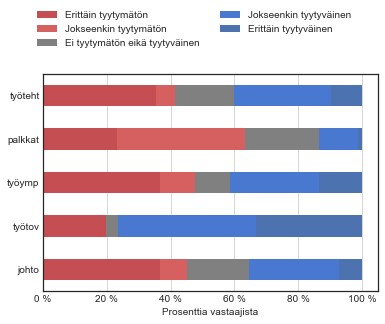

In [12]:
# Edellinen 100 % pylväinä
df4.drop('Yhteensä').T.plot.barh(stacked = True, 
                    color = ['#C44E52', '#D65F5F', 'gray', '#4878CF', '#4C72B0'])

plt.xlabel('Prosenttia vastaajista')

# Selitteen sijainti; 2 selitettä vierekkäin
plt.legend(loc=(-0.03, 1.1), ncol=2)

# x-akselin jakoviivojen otsikoiden muotoilu
plt.gca().xaxis.set_major_formatter(myFmt1)

# Pystysuuntainen taustaviivoitus
plt.grid(axis='x')

Matplotlib mahdollistaa monenlaisia toteutuksia. Seuraavassa laadin viiden kaavion yhdistelmän

- parametrilla **subplots=True** määritän, että jokaisesta sarakkeesta oma kaavio
- parametrilla **layout=(1, 5)** määritän, että kaaviot sijoitetaan 1 riville, 5 rinnakkain
- parametreilla **sharex=True, sharey=True** määritän, että kaikilla kaavioilla on yhteiset akselit
- parametrilla **figsize=(12, 2)** määritän kuvion koon
- parametrilla **legend=False** jätän kaavioista selitteet pois

Text(0.08, 0.5, '%')

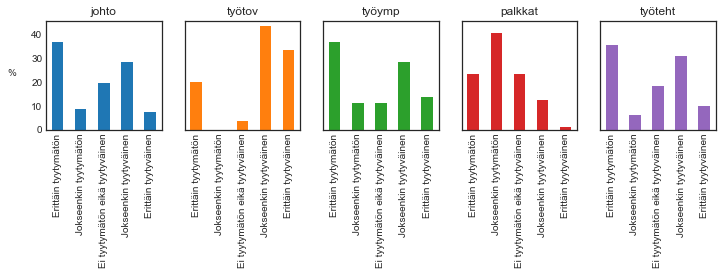

In [13]:
(df4.drop('Yhteensä')*100).plot.bar(subplots=True, layout=(1, 5), sharex=True, sharey=True, 
              figsize = (12, 2), legend = False)

# Kuvio, jonka sisällä kaaviot sijaitsevat (gcf = get current figure)
fig = plt.gcf()

# %-merkki kuvion sijaintiin (0.08, 0.5)
fig.text(0.08, 0.5, "%")

## count-funktio laskee monivalintojen yhteenvedot

In [14]:
# Monivalintojen lukumäärät
df5 = df[monivalinnat].count()

# Muutan series-tyyppisen tietorakenteen dataframeksi (to_frame) ja järjestän lukumäärien mukaiseen järjestykseen (sort_values)
df5 = df5.to_frame('f').sort_values(by='f', ascending=False)

df5

,f
työterv,47
hieroja,22
lomaosa,20
kuntosa,9


In [15]:
# Prosenttia vastaajien kokonaismäärästä (shape[0])
df5['% vastaajista'] = df5['f'] / df.shape[0] * 100

# Loppusilaus
df5.style.format({'f':'{:.0f}', '% vastaajista':'{:.1f} %'}, decimal=',')

,f,% vastaajista
työterv,47,"57,3 %"
hieroja,22,"26,8 %"
lomaosa,20,"24,4 %"
kuntosa,9,"11,0 %"


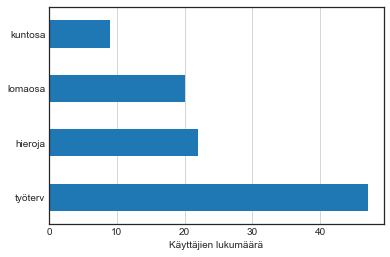

In [16]:
# Edellinen pylväinä
df5['f'].plot.barh(legend=False)

plt.xlabel('Käyttäjien lukumäärä')

# Pystysuuntainen taustaviivoitus
plt.grid(axis='x')

In [17]:
# Monivalinnat sukupuolen mukaan
df6 = df.groupby('sukup')[monivalinnat].count()

# Sukupuolet sukup-listasta, jonka määrittelin aiemmin
df6.index = sukup

df6

,työterv,lomaosa,kuntosa,hieroja
Mies,35,16,8,13
Nainen,12,4,1,9


In [18]:
# Monivalinnat sukupuolen mukaan
df7 = df.groupby('sukup')[monivalinnat].count()

# Miesten ja naisten lukumäärät
miehet = df['sukup'].value_counts()[1]
naiset = df['sukup'].value_counts()[2]

# Prosentit
# iloc[0] viittaa indeksin mukaiselle 0-riville (miesten rivi)
df7.iloc[0] = df7.iloc[0] / miehet
df7.iloc[1] = df7.iloc[1] / naiset

# Kikkailen n-arvot mukaan
df7.index = [f'Mies, n = {miehet}', f'Nainen, n = {naiset}']

# Loppusilaus
(df7*100).style.format('{:.1f} %', decimal=',')

,työterv,lomaosa,kuntosa,hieroja
"Mies, n = 63","55,6 %","25,4 %","12,7 %","20,6 %"
"Nainen, n = 19","63,2 %","21,1 %","5,3 %","47,4 %"


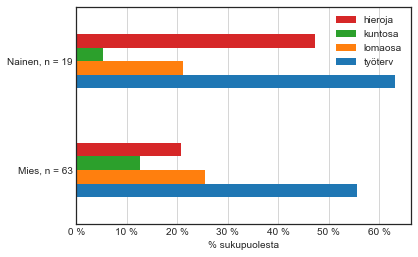

In [19]:
# Edellinen pylväinä
df7.plot.barh(legend='reverse')

plt.xlabel('% sukupuolesta')

# x-akselin jakoviivojen otsikoiden muotoilu
plt.gca().xaxis.set_major_formatter(myFmt1)

# Pystysuuntainen taustaviivoitus
plt.grid(axis='x')

## Luokiteltu jakauma

Pandas-kirjaston **cut**-toiminnolla voin luokitella muuttujan. Oletuksena luokan yläraja kuuluu luokkaan. Parametrilla **right = False** voin vaihtaa luokan alarajan kuulumaan luokkaan.

In [20]:
# Määrittelen luokkarajat palkan luokittelemiseksi
rajat = [1000, 2000, 3000, 4000, 7000]

# Lisään dataan palkkaluokka-sarakkeen
df['palkkaluokka'] = pd.cut(df['palkka'], bins=rajat)

# Palkkaluokkiin kuuluvien lukumäärät
df8 = pd.crosstab(df['palkkaluokka'], 'f')
df8.columns.name = ''

# Prosentit
df8['f (%)'] = df8 / df8.sum() * 100

# Yhteensä-rivin lisäämiseksi indeksin luokkaväliarvot on ensin muuutettava merkkijonoiksi,
# koska dataframen sarake saa sisältää vain yhden tyyppistä tietoa!
# Nykyisissä kirjastoversioissa ei enää tarpeellinen
df8.index = df8.index.astype(str)

df8.loc['Yhteensä'] = df8.sum()

# Loppusilaus
df8.style.format({'f':'{:.0f}', 'f (%)':'{:.1f} %'}, decimal=',')

,f,f (%)
palkkaluokka,,
"(1000, 2000]",19,"23,2 %"
"(2000, 3000]",50,"61,0 %"
"(3000, 4000]",8,"9,8 %"
"(4000, 7000]",5,"6,1 %"
Yhteensä,82,"100,0 %"


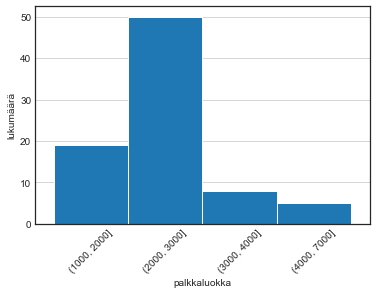

In [21]:
# Edellinen kaaviona; width = 1 laittaa pylväät kiinni toisiinsa
# rot = 45 kääntää x-akselin jakoviivojen otsikoita 45 astetta
df8.drop('Yhteensä')['f'].plot.bar(width=1, rot=45, legend=False, edgecolor='white')

plt.ylabel('lukumäärä')

# Vaakasuuntainen taustaviivoitus
plt.grid(axis='y')

Text(0, 0.5, 'Lukumäärä')

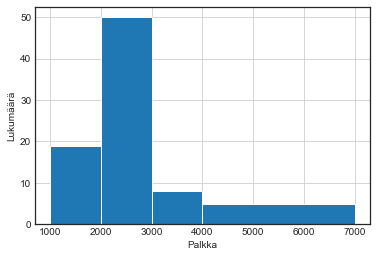

In [22]:
# Nopein tapa luokitellun jakauman tarkasteluun on hist-kaavio
df['palkka'].hist(bins=rajat, edgecolor='white')

plt.xlabel('Palkka')
plt.ylabel('Lukumäärä')

**hist**-toiminnolla tehdyssä histogrammissa pylvään leveys riippuu oikeaoppisesti luokkavälin pituudesta (tässä luokkaan (4000, 7000] liittyvä pylväs on muita leveämpi.

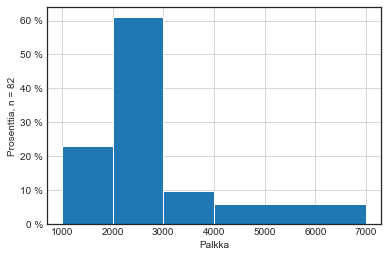

In [23]:
# np.ones kikalla prosentit hist-kaavioon
# np.ones tuottaa n kpl ykkösiä, jolloin jokaiselle luokalle tulee painoksi 1/n

# Histogrammi, jossa y-akselilla prosentit
n = df['palkka'].count()

df['palkka'].hist(bins=rajat, weights=np.ones(n)/n, edgecolor='white')

plt.xlabel('Palkka')
plt.ylabel(f'Prosenttia, n = {n}')

# x-akselin jakoviivojen otsikoiden muotoilu
plt.gca().yaxis.set_major_formatter(myFmt1)

## Lisätietoa

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/